In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("Train (1).csv")
df.sample(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3951,Kenya,2018,uniqueid_3952,No,Rural,Yes,1,71,Female,Head of Household,Widowed,Primary education,Informally employed
4538,Kenya,2018,uniqueid_4539,No,Rural,Yes,7,70,Female,Head of Household,Widowed,Primary education,Remittance Dependent
13485,Rwanda,2016,uniqueid_7418,Yes,Rural,Yes,5,34,Male,Head of Household,Married/Living together,Primary education,Informally employed
12788,Rwanda,2016,uniqueid_6721,No,Rural,Yes,1,75,Female,Head of Household,Widowed,No formal education,Government Dependent
14557,Rwanda,2016,uniqueid_8490,No,Rural,Yes,6,60,Male,Head of Household,Married/Living together,No formal education,Informally employed
9368,Rwanda,2016,uniqueid_3301,No,Rural,Yes,4,29,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing
19700,Tanzania,2017,uniqueid_4898,Yes,Urban,Yes,2,34,Male,Head of Household,Single/Never Married,Primary education,Self employed
6693,Rwanda,2016,uniqueid_626,No,Rural,Yes,3,60,Female,Head of Household,Widowed,No formal education,Remittance Dependent
208,Kenya,2018,uniqueid_209,No,Rural,No,5,80,Female,Head of Household,Widowed,No formal education,Government Dependent
22266,Uganda,2018,uniqueid_844,Yes,Urban,Yes,13,47,Male,Parent,Married/Living together,Primary education,Formally employed Private


In [51]:
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [54]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [55]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [56]:
df_categorical = df.select_dtypes(["object"])
df_categorical.columns


Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [57]:
df.describe(include='O').transpose()

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_17,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [58]:
df[df["uniqueid"] == "uniqueid_17"]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
16,Kenya,2018,uniqueid_17,No,Urban,Yes,1,47,Female,Head of Household,Married/Living together,Secondary education,Self employed
6084,Rwanda,2016,uniqueid_17,No,Rural,Yes,3,24,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
14819,Tanzania,2017,uniqueid_17,No,Urban,No,1,38,Female,Head of Household,Widowed,Primary education,Self employed
21439,Uganda,2018,uniqueid_17,No,Rural,No,4,50,Female,Head of Household,Divorced/Seperated,Primary education,Self employed


In [59]:
df["country"].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [60]:
df["uniqueid"].value_counts()

uniqueid
uniqueid_17      4
uniqueid_16      4
uniqueid_18      4
uniqueid_2       4
uniqueid_3       4
                ..
uniqueid_7303    1
uniqueid_7302    1
uniqueid_7301    1
uniqueid_7300    1
uniqueid_7308    1
Name: count, Length: 8735, dtype: int64

In [61]:
df["gender_of_respondent"].value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [62]:
df2=df[["gender_of_respondent","country"]].value_counts()
df2

gender_of_respondent  country 
Female                Rwanda      5204
                      Tanzania    3806
Male                  Rwanda      3531
Female                Kenya       3482
Male                  Tanzania    2814
                      Kenya       2586
Female                Uganda      1385
Male                  Uganda       716
Name: count, dtype: int64

In [63]:
df2.index

MultiIndex([('Female',   'Rwanda'),
            ('Female', 'Tanzania'),
            (  'Male',   'Rwanda'),
            ('Female',    'Kenya'),
            (  'Male', 'Tanzania'),
            (  'Male',    'Kenya'),
            ('Female',   'Uganda'),
            (  'Male',   'Uganda')],
           names=['gender_of_respondent', 'country'])

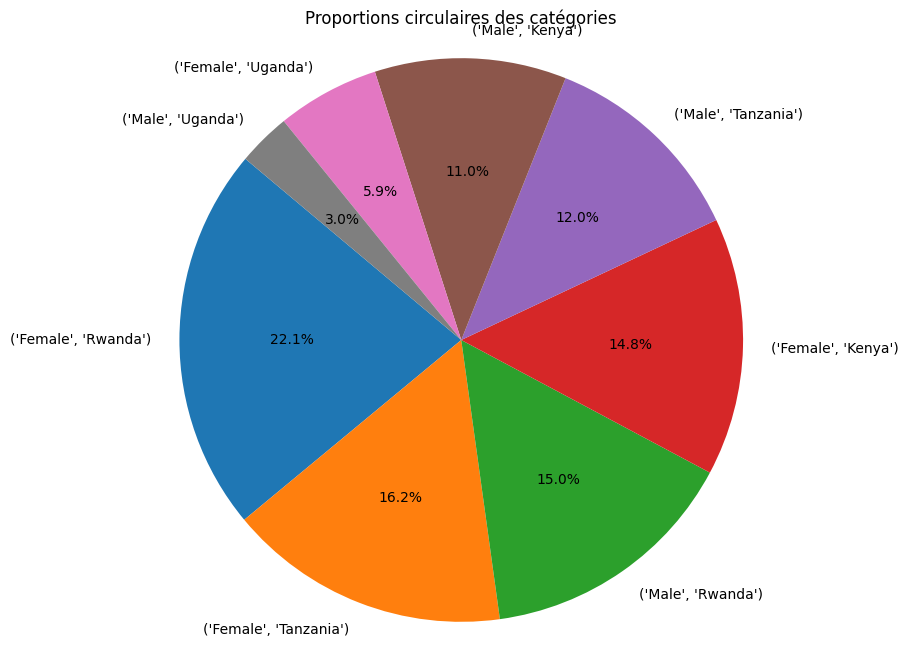

In [64]:

# Calculer les proportions
proportions = df2 / df2.sum()

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=df2.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions circulaires des catégories')
plt.axis('equal')  # Pour s'assurer que le diagramme soit un cercle plutôt qu'une ellipse
plt.show()

In [65]:
df[["bank_account", "location_type"]].sample(7)

,bank_account,location_type
20120,No,Urban
9678,No,Rural
13877,No,Rural
6077,Yes,Urban
17,Yes,Rural
1378,No,Rural
1032,No,Rural


In [66]:
df[["bank_account","location_type"]].value_counts(normalize=True)

bank_account  location_type
No            Rural            0.538684
              Urban            0.320524
Yes           Rural            0.071034
              Urban            0.069759
Name: proportion, dtype: float64

In [67]:
df3=df[df["location_type"]=="Rural"]
df3["bank_account"].value_counts(normalize=True)

bank_account
No     0.883497
Yes    0.116503
Name: proportion, dtype: float64

In [68]:
df[["bank_account", "cellphone_access"]].sample(7)

,bank_account,cellphone_access
7485,Yes,Yes
15301,No,Yes
13868,No,Yes
12419,No,Yes
9477,No,Yes
6482,No,Yes
5832,Yes,Yes


In [69]:
df[["bank_account", "cellphone_access"]].groupby("cellphone_access")["bank_account"].apply(lambda x : x.value_counts(normalize="True"))

cellphone_access  No 
No                No     0.982867
                  Yes    0.017133
Yes               No     0.816203
                  Yes    0.183797
Name: bank_account, dtype: float64

In [70]:
df[["bank_account", "year"]].groupby("year")["bank_account"].apply(lambda x:x.value_counts(normalize="True"))

year  2016
2016  No      0.885175
      Yes     0.114825
2017  No      0.908308
      Yes     0.091692
2018  No      0.791651
      Yes     0.208349
Name: bank_account, dtype: float64

In [71]:
df[["bank_account", "education_level"]].groupby("education_level")["bank_account"].apply(lambda x : x.value_counts(normalize=True).sort_index())

education_level                  No formal education
No formal education              No                     0.961019
                                 Yes                    0.038981
Other/Dont know/RTA              No                     0.685714
                                 Yes                    0.314286
Primary education                No                     0.914549
                                 Yes                    0.085451
Secondary education              No                     0.767227
                                 Yes                    0.232773
Tertiary education               No                     0.489196
                                 Yes                    0.510804
Vocational/Specialised training  No                     0.429639
                                 Yes                    0.570361
Name: bank_account, dtype: float64

In [72]:
df[["bank_account", "education_level","marital_status"]].groupby(["education_level","marital_status"])["bank_account"].apply(lambda x : x.value_counts(normalize=True).sort_index())

education_level                  marital_status              
No formal education              Divorced/Seperated       No     0.965190
                                                          Yes    0.034810
                                 Dont know                No     1.000000
                                 Married/Living together  No     0.956028
                                                          Yes    0.043972
                                 Single/Never Married     No     0.980769
                                                          Yes    0.019231
                                 Widowed                  No     0.955291
                                                          Yes    0.044709
Other/Dont know/RTA              Divorced/Seperated       No     1.000000
                                 Married/Living together  No     0.714286
                                                          Yes    0.285714
                                 Single/Never Marr

In [73]:
nvo=['country', 'year',  'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

In [74]:
X=df[nvo]
y=df["bank_account"]

In [75]:
X.shape

(23524, 11)

In [76]:
y.shape

(23524,)

In [77]:
X=pd.get_dummies(X,columns=['country',  'location_type',
       'cellphone_access','gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'])
X.sample(4)

,year,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
12679,2016,3,16,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3483,2018,8,71,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
8407,2016,3,26,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
13138,2016,7,31,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
def test_model(model):

    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    rapport_classification = classification_report(y_test, y_pred)
    print("accuracy=",accuracy*100,"%")
    print(rapport_classification)
    return rapport_classification

In [80]:
test_model(RandomForestClassifier(n_estimators=100))

accuracy= 85.99362380446334 %
              precision    recall  f1-score   support

          No       0.91      0.93      0.92      4063
         Yes       0.48      0.39      0.43       642

    accuracy                           0.86      4705
   macro avg       0.70      0.66      0.68      4705
weighted avg       0.85      0.86      0.85      4705



'              precision    recall  f1-score   support\n\n          No       0.91      0.93      0.92      4063\n         Yes       0.48      0.39      0.43       642\n\n    accuracy                           0.86      4705\n   macro avg       0.70      0.66      0.68      4705\nweighted avg       0.85      0.86      0.85      4705\n'

In [81]:
test_model(GradientBoostingClassifier(n_estimators=100))

accuracy= 89.09670563230605 %
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      4063
         Yes       0.71      0.34      0.46       642

    accuracy                           0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.88      0.89      0.87      4705



'              precision    recall  f1-score   support\n\n          No       0.90      0.98      0.94      4063\n         Yes       0.71      0.34      0.46       642\n\n    accuracy                           0.89      4705\n   macro avg       0.81      0.66      0.70      4705\nweighted avg       0.88      0.89      0.87      4705\n'